In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('placement.csv')

In [59]:
df.sample(5)

,cgpa,placement_exam_marks,placed
933,6.01,9.0,0
282,6.43,44.0,1
126,7.16,37.0,0
757,6.84,15.0,0
960,6.81,10.0,1


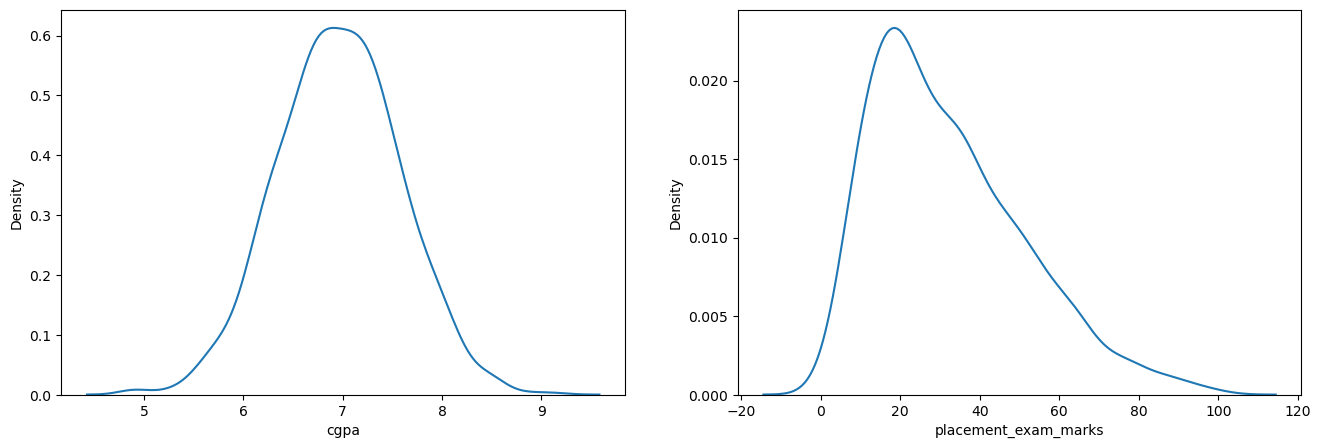

In [61]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [63]:
print('Mean value of CGPA: ', df['cgpa'].mean())
print('Std value of CGPA: ', df['cgpa'].std())
print('Minimum value of CGPA: ', df['cgpa'].min())
print('Maximum value of CGPA: ', df['cgpa'].max())

Mean value of CGPA:  6.96124
Std value of CGPA:  0.6158978751323894
Minimum value of CGPA:  4.89
Maximum value of CGPA:  9.12


In [65]:
# Finding the boundary values
print('Highest boundary value: ', df['cgpa'].mean() + (3 * df['cgpa'].std()))
print('Lowest boundary value: ', df['cgpa'].mean() - (3 * df['cgpa'].std()))

Highest boundary value:  8.808933625397168
Lowest boundary value:  5.113546374602832


In [76]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [79]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [83]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [85]:
# Approach 2

# Calculation Z Score

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [87]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [89]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [93]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [97]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)] # TO SHOW THEM TOGETHER

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [99]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [101]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## CAPPING

In [104]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()

In [106]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit, # condition
    upper_limit, # if condition is true with what value to replace it
    np.where( # what to do if condition is false
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [108]:
df['cgpa'].describe()

count    1.000000e+03
mean     8.808934e+00
std      5.864911e-14
min      8.808934e+00
25%      8.808934e+00
50%      8.808934e+00
75%      8.808934e+00
max      8.808934e+00
Name: cgpa, dtype: float64